<a href="https://colab.research.google.com/github/mbagci06/lung_covid/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1MIzhxSou4TRtQTcG3AADqLag28nj3FrV?usp=sharing

Retrieving folder list
Retrieving folder 1-0l5hmY5hmdamdO5ZZUBzojpporaBi-h .ipynb_checkpoints
Processing file 1qkvy4UI9Cw766oLUPZvkZ4eA2OipsT6- deeplab_covid_30_epo.pth
Processing file 1uEImWp2mLOjMV-7Ge3_WaTVRcmDmnSco deeplab_covid_30_epo.txt
Processing file 1TnQLuc4N8kEssqn9Wmb7hGKaaHC1FJ9H deeplab_fransfer_lung_50_epo.pth
Processing file 1tcMX2dtdHO17cdE09bmRZDTg0zovvtUH deeplab_lung_30_epo.pth
Processing file 1RM9kH2BAG7yq-L2larWPS23levRhgMRz deeplab_lung_30_epo.txt
Processing file 1-1O520KqAGWnAQL8DHT0SjS6MXcV7Rbs deeplab_transfer_covid_60_epo.pth
Processing file 1-6_dEdEihVa2gPVyfode50OoTVUzZ1vy deeplab_transfer_covid_60_epo.txt
Processing file 1RG-Unwxf0hLD-cwVT6reGK47RvzLCCeZ deeplab_transfer_lung_50_epo.txt
Processing file 1NdJZO_B3uoQ7pmEVS3ClGv0dL3FoTlS3 UNet_covid_50_epo.txt
Processing file 1XBugwkZDCu85Nkd6P85_1Wtca98W7-hk UNet_covid_50_epoch.pt
Processing file 1-0KJb_gFSzbJ6wHcVS7VUKTZaoZOmPDK UNet_model_lung_pre_20_epo.txt
Processing file 1jV0bCKORrmsP5XFM5cHXJ_8pQMAFdhH

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18



In [ ]:
def loss_acc_reader(file_name):
    """reading the loss and accuracy values

    :param file_name  : string : location of the values 

    :returns : the list of metrics in 4,-1 shape 
    :rtype   : list
    """
    with open('ECE228_models_texts/'+file_name) as f:
      lines = f.readlines()
    data=lines[1].replace(',',"").replace('[','').replace(']','')
    data_list=np.array((data.split(' ')))
    data_deeplab_lung=np.float_(data_list.reshape(4,-1))
    return data_deeplab_lung

- UNet_model_lung_pre_30_epo.txt
- UNet_covid_50_epo.txt
- UNet_NONORM_covid_30_epo.txt
- UNet_transfer_lung_50_epo.txt
- UNet_transfer_covid_90_epo.txt

- deeplab_covid_30_epo.txt
- deeplab_lung_30_epo.txt
- deeplab_transfer_lung_50_epo.txt
- deeplab_transfer_covid_60_epo.txt

In [ ]:
ul=loss_acc_reader('UNet_model_lung_pre_30_epo.txt')
uc=loss_acc_reader('UNet_covid_50_epo.txt')
ucnn=loss_acc_reader('UNet_NONORM_covid_30_epo.txt')
utl=loss_acc_reader('UNet_transfer_lung_50_epo.txt')
utc=loss_acc_reader('UNet_transfer_covid_90_epo.txt')
dl=loss_acc_reader('deeplab_lung_30_epo.txt')
dc=loss_acc_reader('deeplab_covid_30_epo.txt')
dtl=loss_acc_reader('deeplab_transfer_lung_50_epo.txt')
dtc=loss_acc_reader('deeplab_transfer_covid_60_epo.txt')

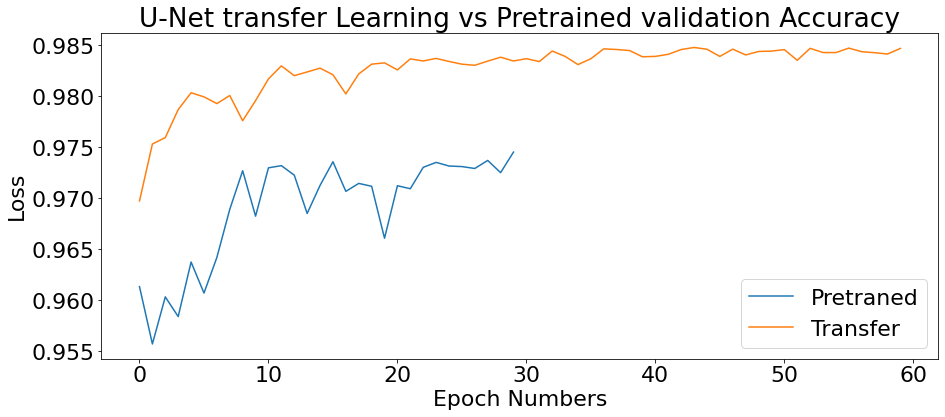

In [ ]:
plt.figure(figsize=(15,6))
plt.title('U-Net transfer Learning vs Pretrained validation Accuracy')
plt.xlabel('Epoch Numbers')
plt.ylabel('Loss')
plt.plot(dc[2])
plt.plot(dtc[2])
plt.legend(['Pretraned','Transfer'])

# plt.figure(figsize=(15,6))
# plt.title('Accuracy Values of DeepLab Lung Data')
# plt.xlabel('Epoch Numbers')
# plt.ylabel('Acc')
# plt.plot(uc[2])
# plt.plot(ucnn[2])
# plt.legend(['Validation Acc','Train Acc'])

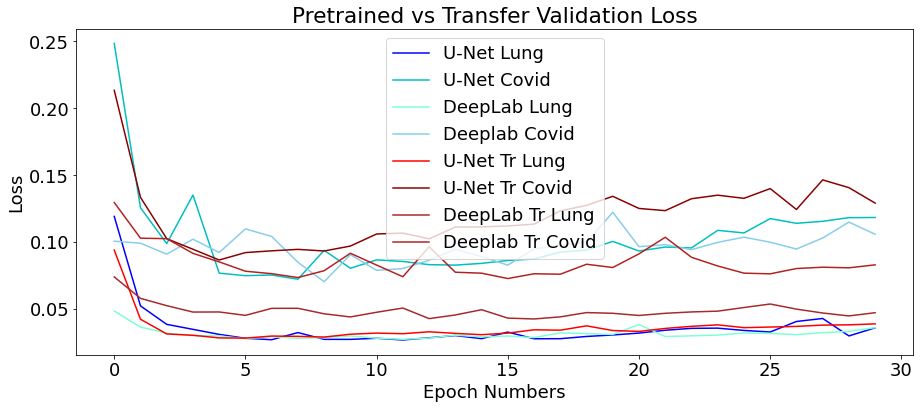

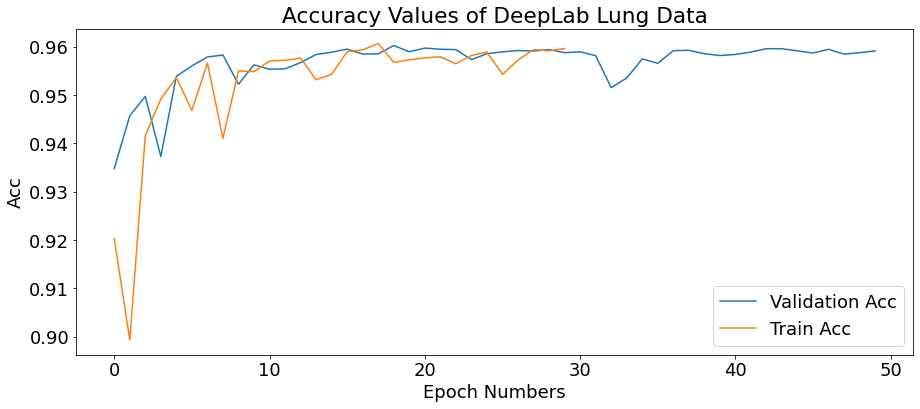

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Pretrained vs Transfer Validation Loss')
plt.xlabel('Epoch Numbers')
plt.ylabel('Loss')
plt.plot(ul[0][:30],'b',uc[0][:30],"c",dl[0][:30],"aquamarine",dc[0][:30],'skyblue')
plt.plot(utl[0][:30],'r',utc[0][:30],'darkred',dtl[0][:30],'brown',dtc[0][:30],'firebrick')
plt.legend(['U-Net Lung','U-Net Covid','DeepLab Lung','Deeplab Covid','U-Net Tr Lung','U-Net Tr Covid','DeepLab Tr Lung','Deeplab Tr Covid'])
plt.figure(figsize=(15,6))
plt.title('Accuracy Values of DeepLab Lung Data')
plt.xlabel('Epoch Numbers')
plt.ylabel('Acc')
plt.plot(uc[2])
plt.plot(ucnn[2])
plt.legend(['Validation Acc','Train Acc'])

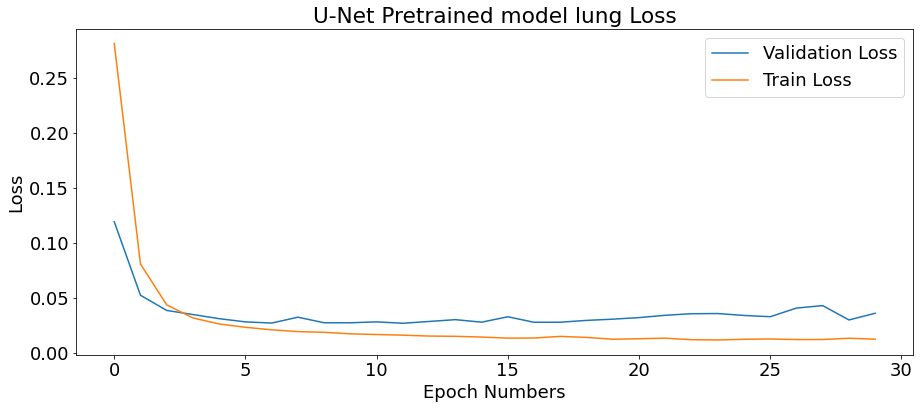

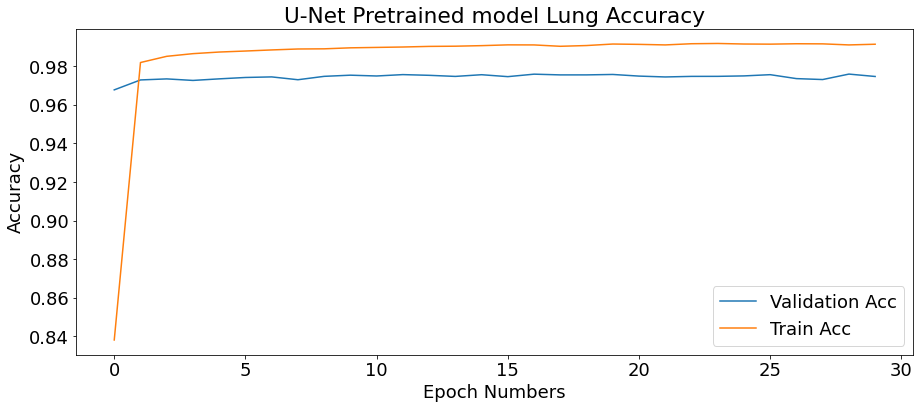

In [ ]:
plt.figure(figsize=(15,6))
plt.title('U-Net Pretrained model lung Loss')
plt.xlabel('Epoch Numbers')
plt.ylabel('Loss')
plt.plot(ul[0])
plt.plot(ul[1])
plt.legend(['Validation Loss','Train Loss'])
plt.figure(figsize=(15,6))
plt.title('U-Net Pretrained model Lung Accuracy')
plt.xlabel('Epoch Numbers')
plt.ylabel('Accuracy')
plt.plot(ul[2])
plt.plot(ul[3])
plt.legend(['Validation Acc','Train Acc'])

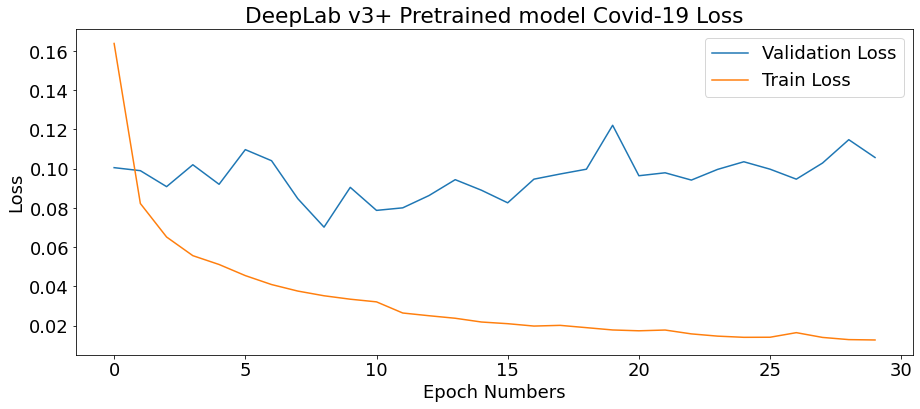

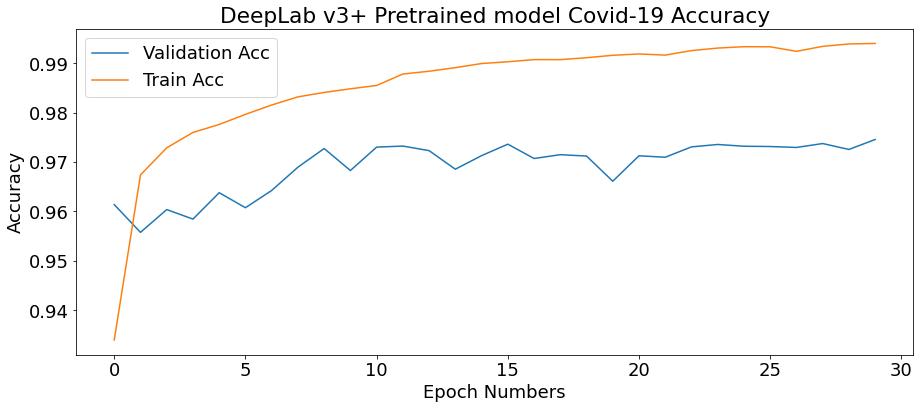

In [ ]:
plt.figure(figsize=(15,6))
plt.title('DeepLab v3+ Pretrained model Covid-19 Loss')
plt.xlabel('Epoch Numbers')
plt.ylabel('Loss')
plt.plot(dc[0])
plt.plot(dc[1])
plt.legend(['Validation Loss','Train Loss'])
plt.figure(figsize=(15,6))
plt.title('DeepLab v3+ Pretrained model Covid-19 Accuracy')
plt.xlabel('Epoch Numbers')
plt.ylabel('Accuracy')
plt.plot(dc[2])
plt.plot(dc[3])
plt.legend(['Validation Acc','Train Acc'])

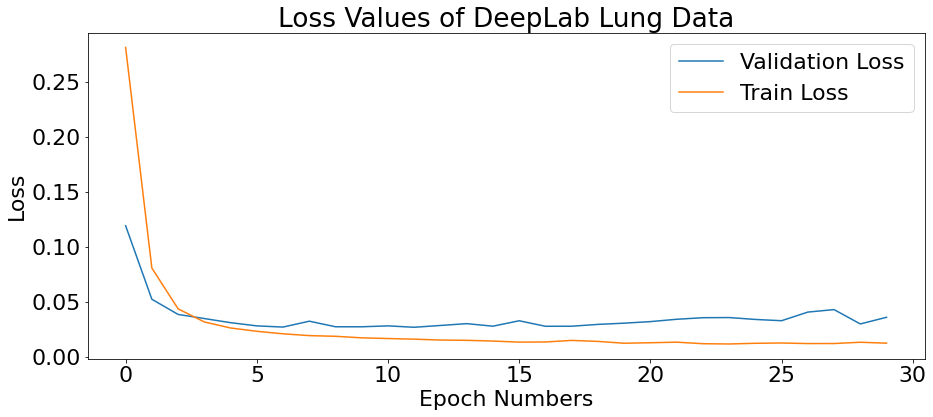

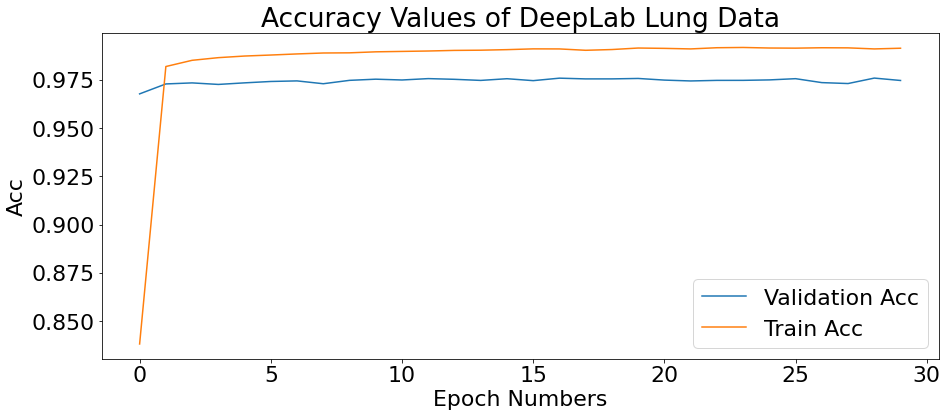

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Loss Values of DeepLab Lung Data')
plt.xlabel('Epoch Numbers')
plt.ylabel('Loss')
plt.plot(ul[0])
plt.plot(ul[1])
plt.legend(['Validation Loss','Train Loss'])
plt.figure(figsize=(15,6))
plt.title('Accuracy Values of DeepLab Lung Data')
plt.xlabel('Epoch Numbers')
plt.ylabel('Acc')
plt.plot(ul[2])
plt.plot(ul[3])
plt.legend(['Validation Acc','Train Acc'])

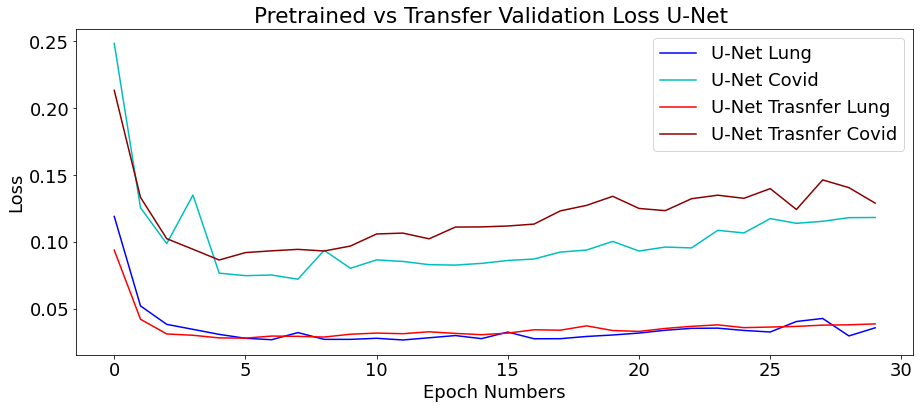

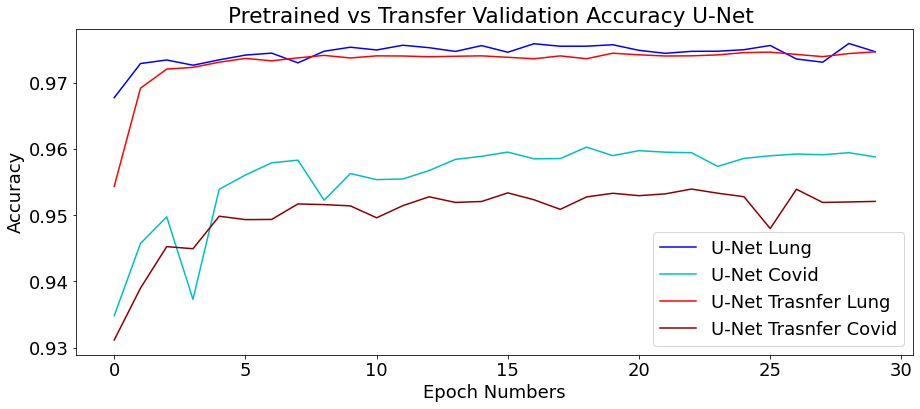

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Pretrained vs Transfer Validation Loss U-Net ')
plt.xlabel('Epoch Numbers')
plt.ylabel('Loss')
plt.plot(ul[0][:30],'b',uc[0][:30],"c")#,dl[0][:30],"aquamarine",dc[0][:30],'skyblue')
plt.plot(utl[0][:30],'r',utc[0][:30],'darkred')#,dtl[0][:30],'brown',dtc[0][:30],'firebrick')
plt.legend(['U-Net Lung','U-Net Covid','U-Net Trasnfer Lung','U-Net Trasnfer Covid'])#,'U-Net Tr Lung','U-Net Tr Covid','DeepLab Tr Lung','Deeplab Tr Covid'])
plt.figure(figsize=(15,6))
plt.title('Pretrained vs Transfer Validation Accuracy U-Net ')
plt.xlabel('Epoch Numbers')
plt.ylabel('Accuracy')
plt.plot(ul[2][:30],'b',uc[2][:30],"c")#,dl[0][:30],"aquamarine",dc[0][:30],'skyblue')
plt.plot(utl[2][:30],'r',utc[2][:30],'darkred')#,dtl[0][:30],'brown',dtc[0][:30],'firebrick')
plt.legend(['U-Net Lung','U-Net Covid','U-Net Trasnfer Lung','U-Net Trasnfer Covid'])#,'U-Net Tr Lung','U-Net Tr Covid','DeepLab Tr Lung','Deeplab Tr Covid'])

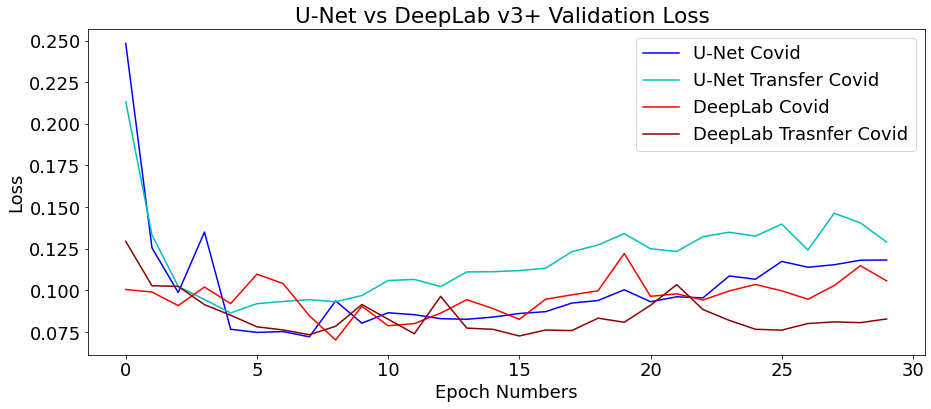

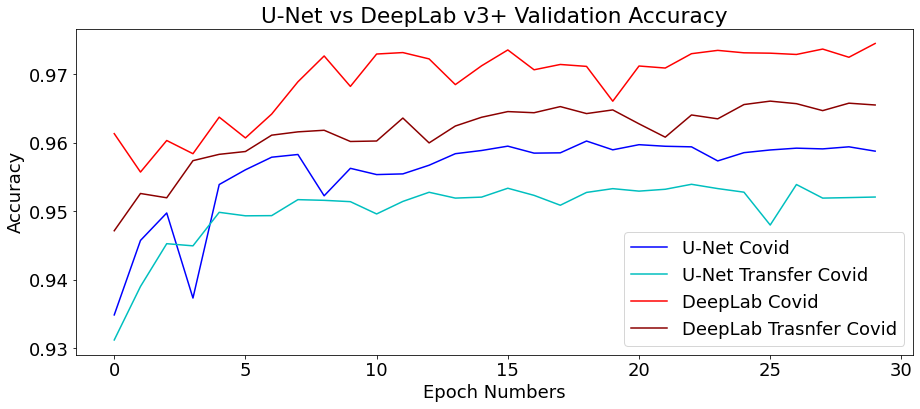

In [ ]:
plt.figure(figsize=(15,6))
plt.title('U-Net vs DeepLab v3+ Validation Loss ')
plt.xlabel('Epoch Numbers')
plt.ylabel('Loss')
plt.plot(uc[0][:30],'b',utc[0][:30],"c")#,dl[0][:30],"aquamarine",dc[0][:30],'skyblue')
plt.plot(dc[0][:30],'r',dtc[0][:30],'darkred')#,dtl[0][:30],'brown',dtc[0][:30],'firebrick')
plt.legend(['U-Net Covid','U-Net Transfer Covid','DeepLab Covid','DeepLab Trasnfer Covid'])#,'U-Net Tr Lung','U-Net Tr Covid','DeepLab Tr Lung','Deeplab Tr Covid'])
plt.figure(figsize=(15,6))
plt.title('U-Net vs DeepLab v3+ Validation Accuracy')
plt.xlabel('Epoch Numbers')
plt.ylabel('Accuracy')
plt.plot(uc[2][:30],'b',utc[2][:30],"c")#,dl[0][:30],"aquamarine",dc[0][:30],'skyblue')
plt.plot(dc[2][:30],'r',dtc[2][:30],'darkred')#,dtl[0][:30],'brown',dtc[0][:30],'firebrick')
plt.legend(['U-Net Covid','U-Net Transfer Covid','DeepLab Covid','DeepLab Trasnfer Covid'])#,'U-Net Tr Lung','U-Net Tr Covid','DeepLab Tr Lung','Deeplab Tr Covid'])